# **Lightkurve**

Lightkurve is a software package written in Python. It makes it easier for anyone to download data from space telescopes and do basic astronomy. We will use Lightkurve to revist known exoplanets.

First, let's get everything installed and make sure it's working.

[Link to interactive notebook.](https://colab.research.google.com/drive/1Nq8Fv47M4Vbz4V1NUdYxWxPSM2HsLI1g?usp=sharing)

In [1]:
%%capture
!pip install -q --upgrade git+https://github.com/keplergo/lightkurve.git

In [2]:
import lightkurve as lk
import numpy as np
%matplotlib inline

<Axes: title={'center': 'Target ID: 246199087, Cadence: 4094110'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

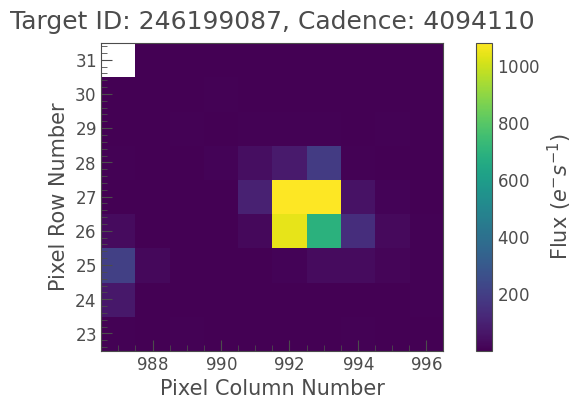

In [3]:
tpf = lk.search_targetpixelfile('Trappist-1')[0].download()
tpf.plot()

# **Exoplanets**

**Exoplanets** (or extra-solar planets) are planets discovered around stars other than the sun. They are mostly discovered using the **transit method**—measuring a small dip in a star's brightness when the planet passes in between the star and your telescope. All known exoplanets are listed on the [NASA Exoplanet Science Institute (NExSci) website](https://nexsci.caltech.edu/).

*Quick Exercise*: How many exoplanets have we found? How many systems have we found with more than one planet?

Click "Confirmed Planets" to get a full list of known exoplanets and their properties. What kinds of planets are you interested in? Let's find one to study!

SearchResult containing 30 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 25 2020      SPOC     120   159742538      0.0
  1 TESS Sector 26 2020      SPOC     120   159742538      0.0
  2 TESS Sector 40 2021      SPOC     120   159742538      0.0
  3 TESS Sector 53 2022      SPOC     120   159742538      0.0
  4 TESS Sector 52 2022      SPOC     120   159742538      0.0
  5 TESS Sector 80 2024      SPOC      20   159742538      0.0
  6 TESS Sector 79 2024      SPOC      20   159742538      0.0
  7 TESS Sector 80 2024      SPOC     120   159742538      0.0
  8 TESS Sector 79 2024      SPOC     120   159742538      0.0
  9 TESS Sector 25 2020 TESS-SPOC    1800   159742538      0.0
 10 TESS Sector 26 2020 TESS-SPOC    1800   159742538      0.0
 11 TESS Sector 40 2021 TESS-SPOC     600   159742538      0.0
 12 TESS Sec

/usr/local/lib/python3.11/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 30 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

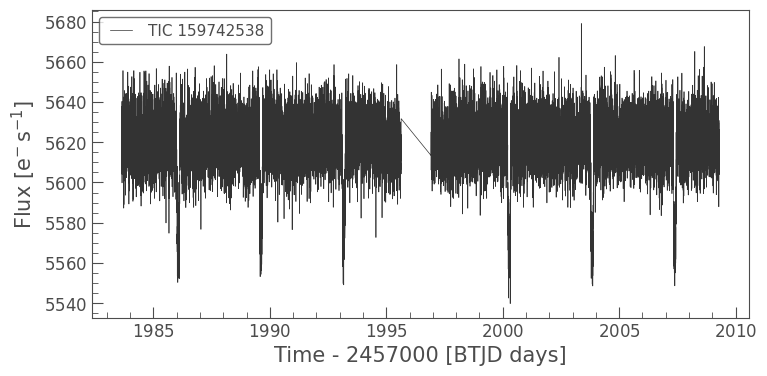

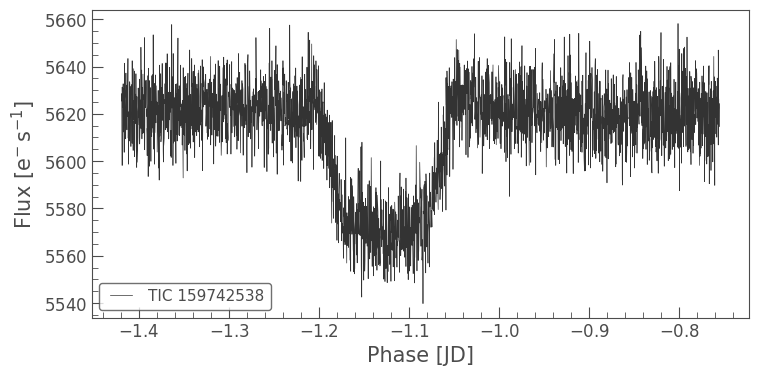

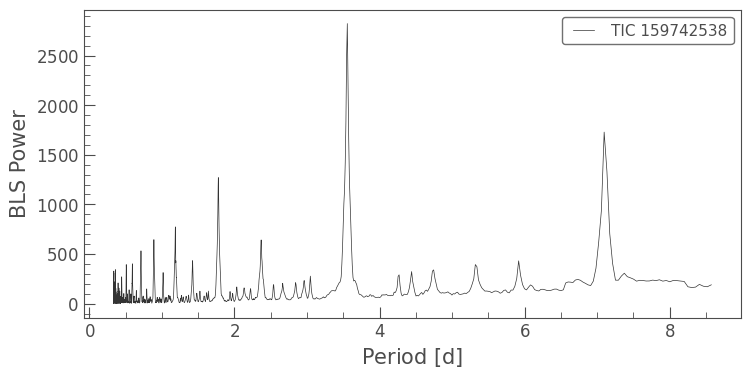

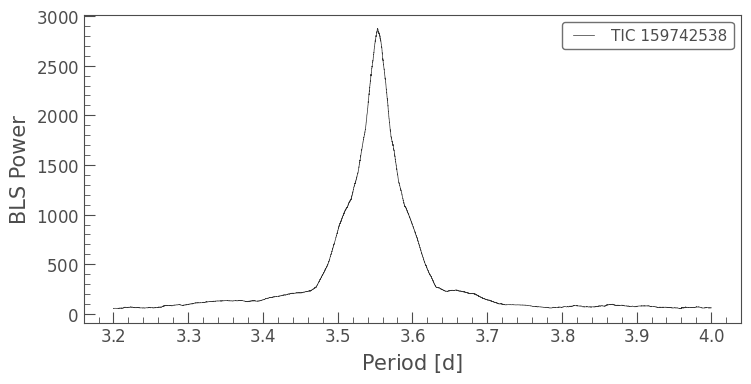

In [4]:
target_name = 'TrES-4'
search_result = lk.search_lightcurve(target_name)
print(search_result)
lc = search_result.download()
lc.plot()
period=3.553950
lc.fold(period)[1500:4450].plot()
bls = lc.to_periodogram('bls')
bls.plot()
periods = np.linspace( 3.2 ,4, 50000)
bls = lc.to_periodogram('bls', period=periods)
bls.plot()

period=3.553367067341347 d, depth=49.930393478546 electron / s, transit time=1986.065317756525
2.3361473913218616


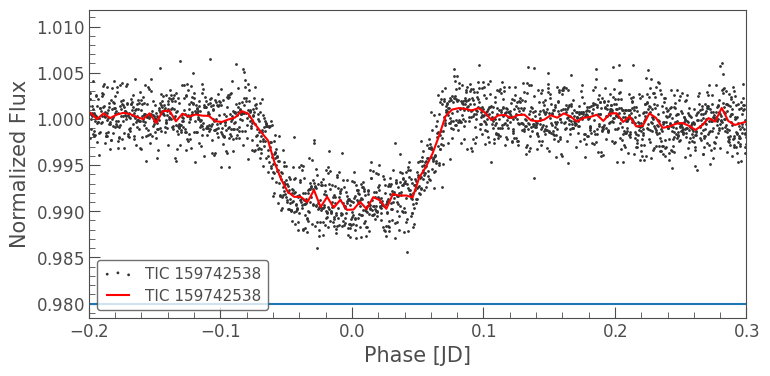

In [5]:
fit_period = bls.period_at_max_power
fit_depth = bls.depth_at_max_power
fit_transit_time = bls.transit_time_at_max_power.value
print(f'period={fit_period}, depth={fit_depth}, transit time={fit_transit_time}')
ax = lc.normalize().fold(fit_period, fit_transit_time).scatter()
lc.normalize().fold(fit_period, fit_transit_time).bin(.005).plot(ax=ax, c='r', lw=1.5)
ax.set_xlim(-0.2, 0.3)

### CHANGE IN-TRANSIT-FLUX BELOW
in_transit_flux = 0.98
depth = 1 - in_transit_flux
###

ax.axhline(in_transit_flux)
rstar = 1.66
rplanet = rstar * np.sqrt(depth) / 0.10049
print(rplanet)

SearchResult containing 15 data products.

 #     mission     year       author      exptime target_name distance
                                             s                 arcsec 
--- -------------- ---- ----------------- ------- ----------- --------
  0 TESS Sector 04 2018              SPOC     120     1129033      0.0
  1 TESS Sector 31 2020              SPOC      20     1129033      0.0
  2 TESS Sector 31 2020              SPOC     120     1129033      0.0
  3 TESS Sector 04 2018         TESS-SPOC    1800     1129033      0.0
  4 TESS Sector 31 2020         TESS-SPOC     600     1129033      0.0
  5 TESS Sector 04 2018               QLP    1800     1129033      0.0
  6 TESS Sector 31 2020               QLP     600     1129033      0.0
  7 TESS Sector 31 2020               QLP     600   632613066      0.0
  8 TESS Sector 04 2018             TASOC     120     1129033      0.0
  9 TESS Sector 04 2018 GSFC-ELEANOR-LITE    1800     1129033      0.0
 10 TESS Sector 04 2018 GSFC-ELEAN

/usr/local/lib/python3.11/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 15 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

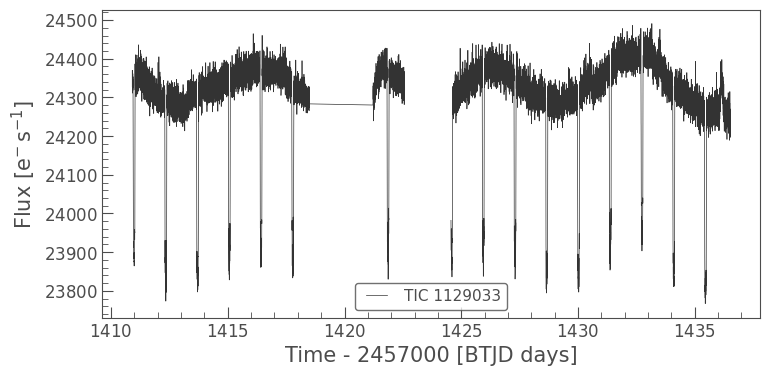

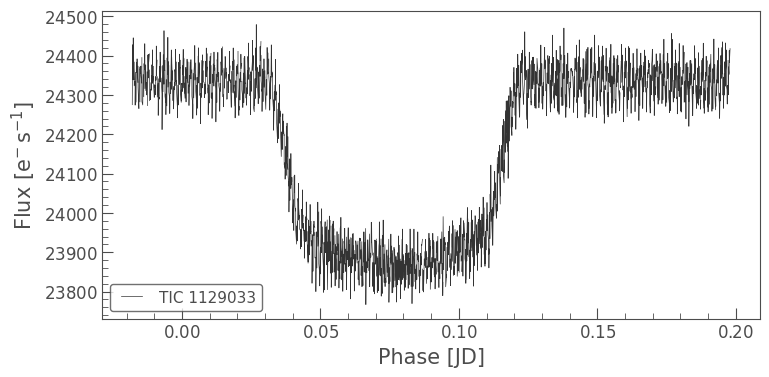

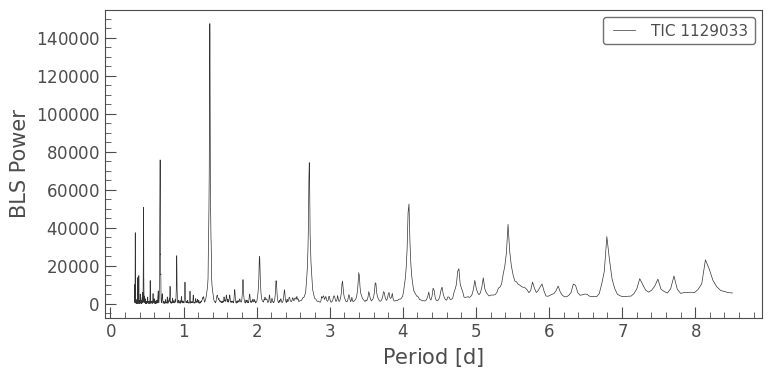

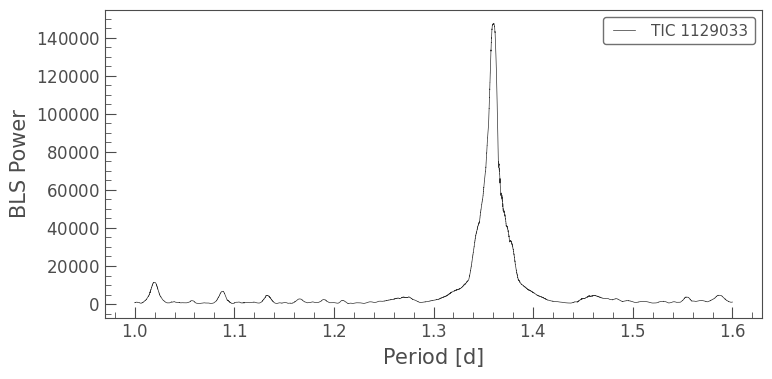

In [6]:
target_name = 'WASP-77 A'
search_result = lk.search_lightcurve(target_name)
print(search_result)
lc = search_result.download()
lc.plot()
period=1.360030
lc.fold(period)[7500:10000].plot()
bls = lc.to_periodogram('bls')
bls.plot()
periods = np.linspace(1, 1.6, 50000)
bls = lc.to_periodogram('bls', period=periods)
bls.plot()

period=1.3601512030240606 d, depth=341.94239298922446 electron / s, transit time=1410.9780001579918
Planet radius = 1.0846850432878898 Jupiter radii


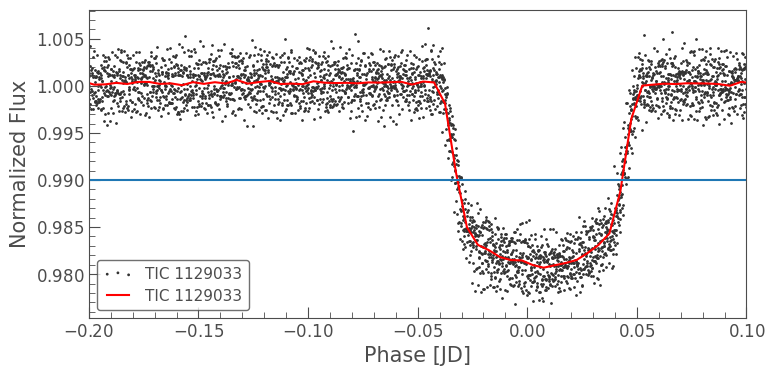

In [7]:
fit_period = bls.period_at_max_power
fit_depth = bls.depth_at_max_power
fit_transit_time = bls.transit_time_at_max_power.value
print(f'period={fit_period}, depth={fit_depth}, transit time={fit_transit_time}')
ax = lc.normalize().fold(fit_period, fit_transit_time).scatter()
lc.normalize().fold(fit_period, fit_transit_time).bin(.005).plot(ax=ax, c='r', lw=1.5)
ax.set_xlim(-0.2, 0.1)

### CHANGE IN-TRANSIT-FLUX BELOW
in_transit_flux = 0.99
depth = 1 - in_transit_flux
###

ax.axhline(in_transit_flux)
rstar = 1.09
rplanet = rstar * np.sqrt(depth) / 0.10049
print(rf'Planet radius = {rplanet} Jupiter radii')

SearchResult containing 12 data products.

 #     mission     year       author      exptime target_name distance
                                             s                 arcsec 
--- -------------- ---- ----------------- ------- ----------- --------
  0 TESS Sector 01 2018              SPOC     120   441420236      0.0
  1 TESS Sector 27 2020              SPOC      20   441420236      0.0
  2 TESS Sector 27 2020              SPOC     120   441420236      0.0
  3 TESS Sector 01 2018         TESS-SPOC    1800   441420236      0.0
  4 TESS Sector 27 2020         TESS-SPOC     600   441420236      0.0
  5 TESS Sector 01 2018               QLP    1800   441420236      0.0
  6 TESS Sector 27 2020               QLP     600   441420236      0.0
  7 TESS Sector 01 2018             TASOC     120   441420236      0.0
  8 TESS Sector 01 2018 GSFC-ELEANOR-LITE    1800   441420236      0.0
  9 TESS Sector 01 2018             TASOC    1800   441420236      0.0
 10 TESS Sector 01 2018           

/usr/local/lib/python3.11/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 12 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<Axes: xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

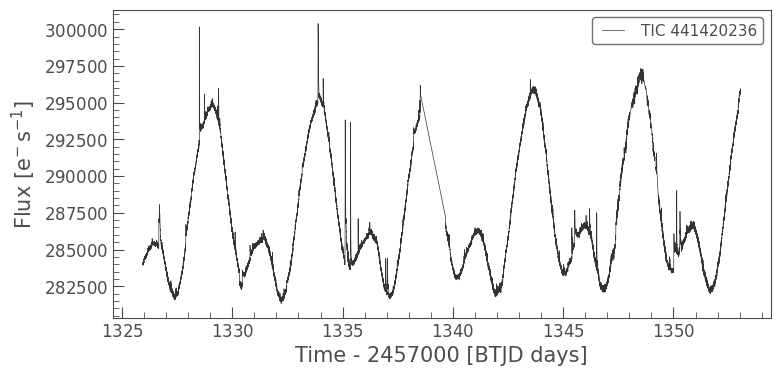

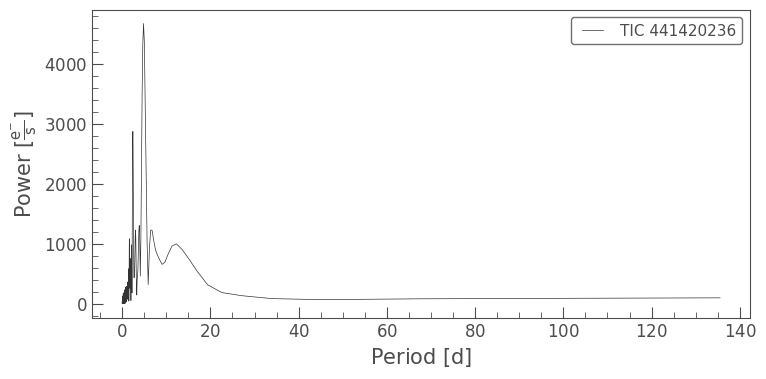

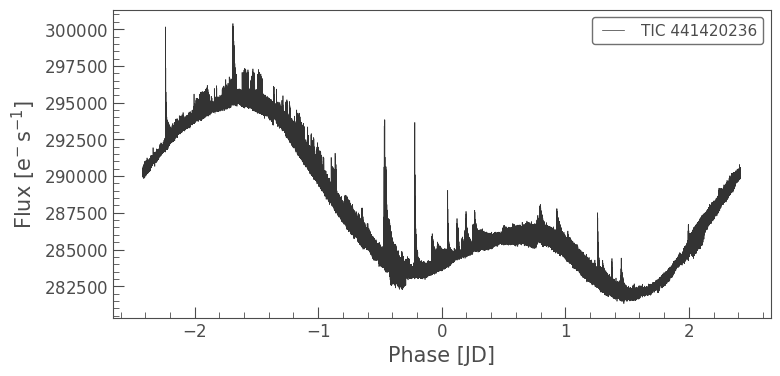

In [8]:
target_name = 'AU Mic '
search_result = lk.search_lightcurve(target_name)
print(search_result)
lc = search_result.download()
lc.plot()
larry=lc.remove_nans().to_periodogram('ls')
larry.plot(view='period')
lc.fold(larry.period_at_max_power).plot()

# The Giants Pipeline

In [9]:
%%capture
!pip install git+https://github.com/nksaunders/giants.git

Below, there is a (very) brief demonstration of using the *giants* pipeline to rediscover the first Giants Transiting Giants planet, [TOI-2184 b](https://ui.adsabs.harvard.edu/abs/2022AJ....163...53S/abstract).

In [10]:
import giants

/usr/local/lib/python3.11/dist-packages/giants/plotting.py:662: RuntimeWarning: Mean of empty slice
  rf = np.nanmean(tpf.flux.value[t_frames], axis=0) - np.nanmean(tpf.flux.value[nt_frames], axis=0)
/usr/local/lib/python3.11/dist-packages/giants/plotting.py:662: RuntimeWarning: Mean of empty slice
  rf = np.nanmean(tpf.flux.value[t_frames], axis=0) - np.nanmean(tpf.flux.value[nt_frames], axis=0)


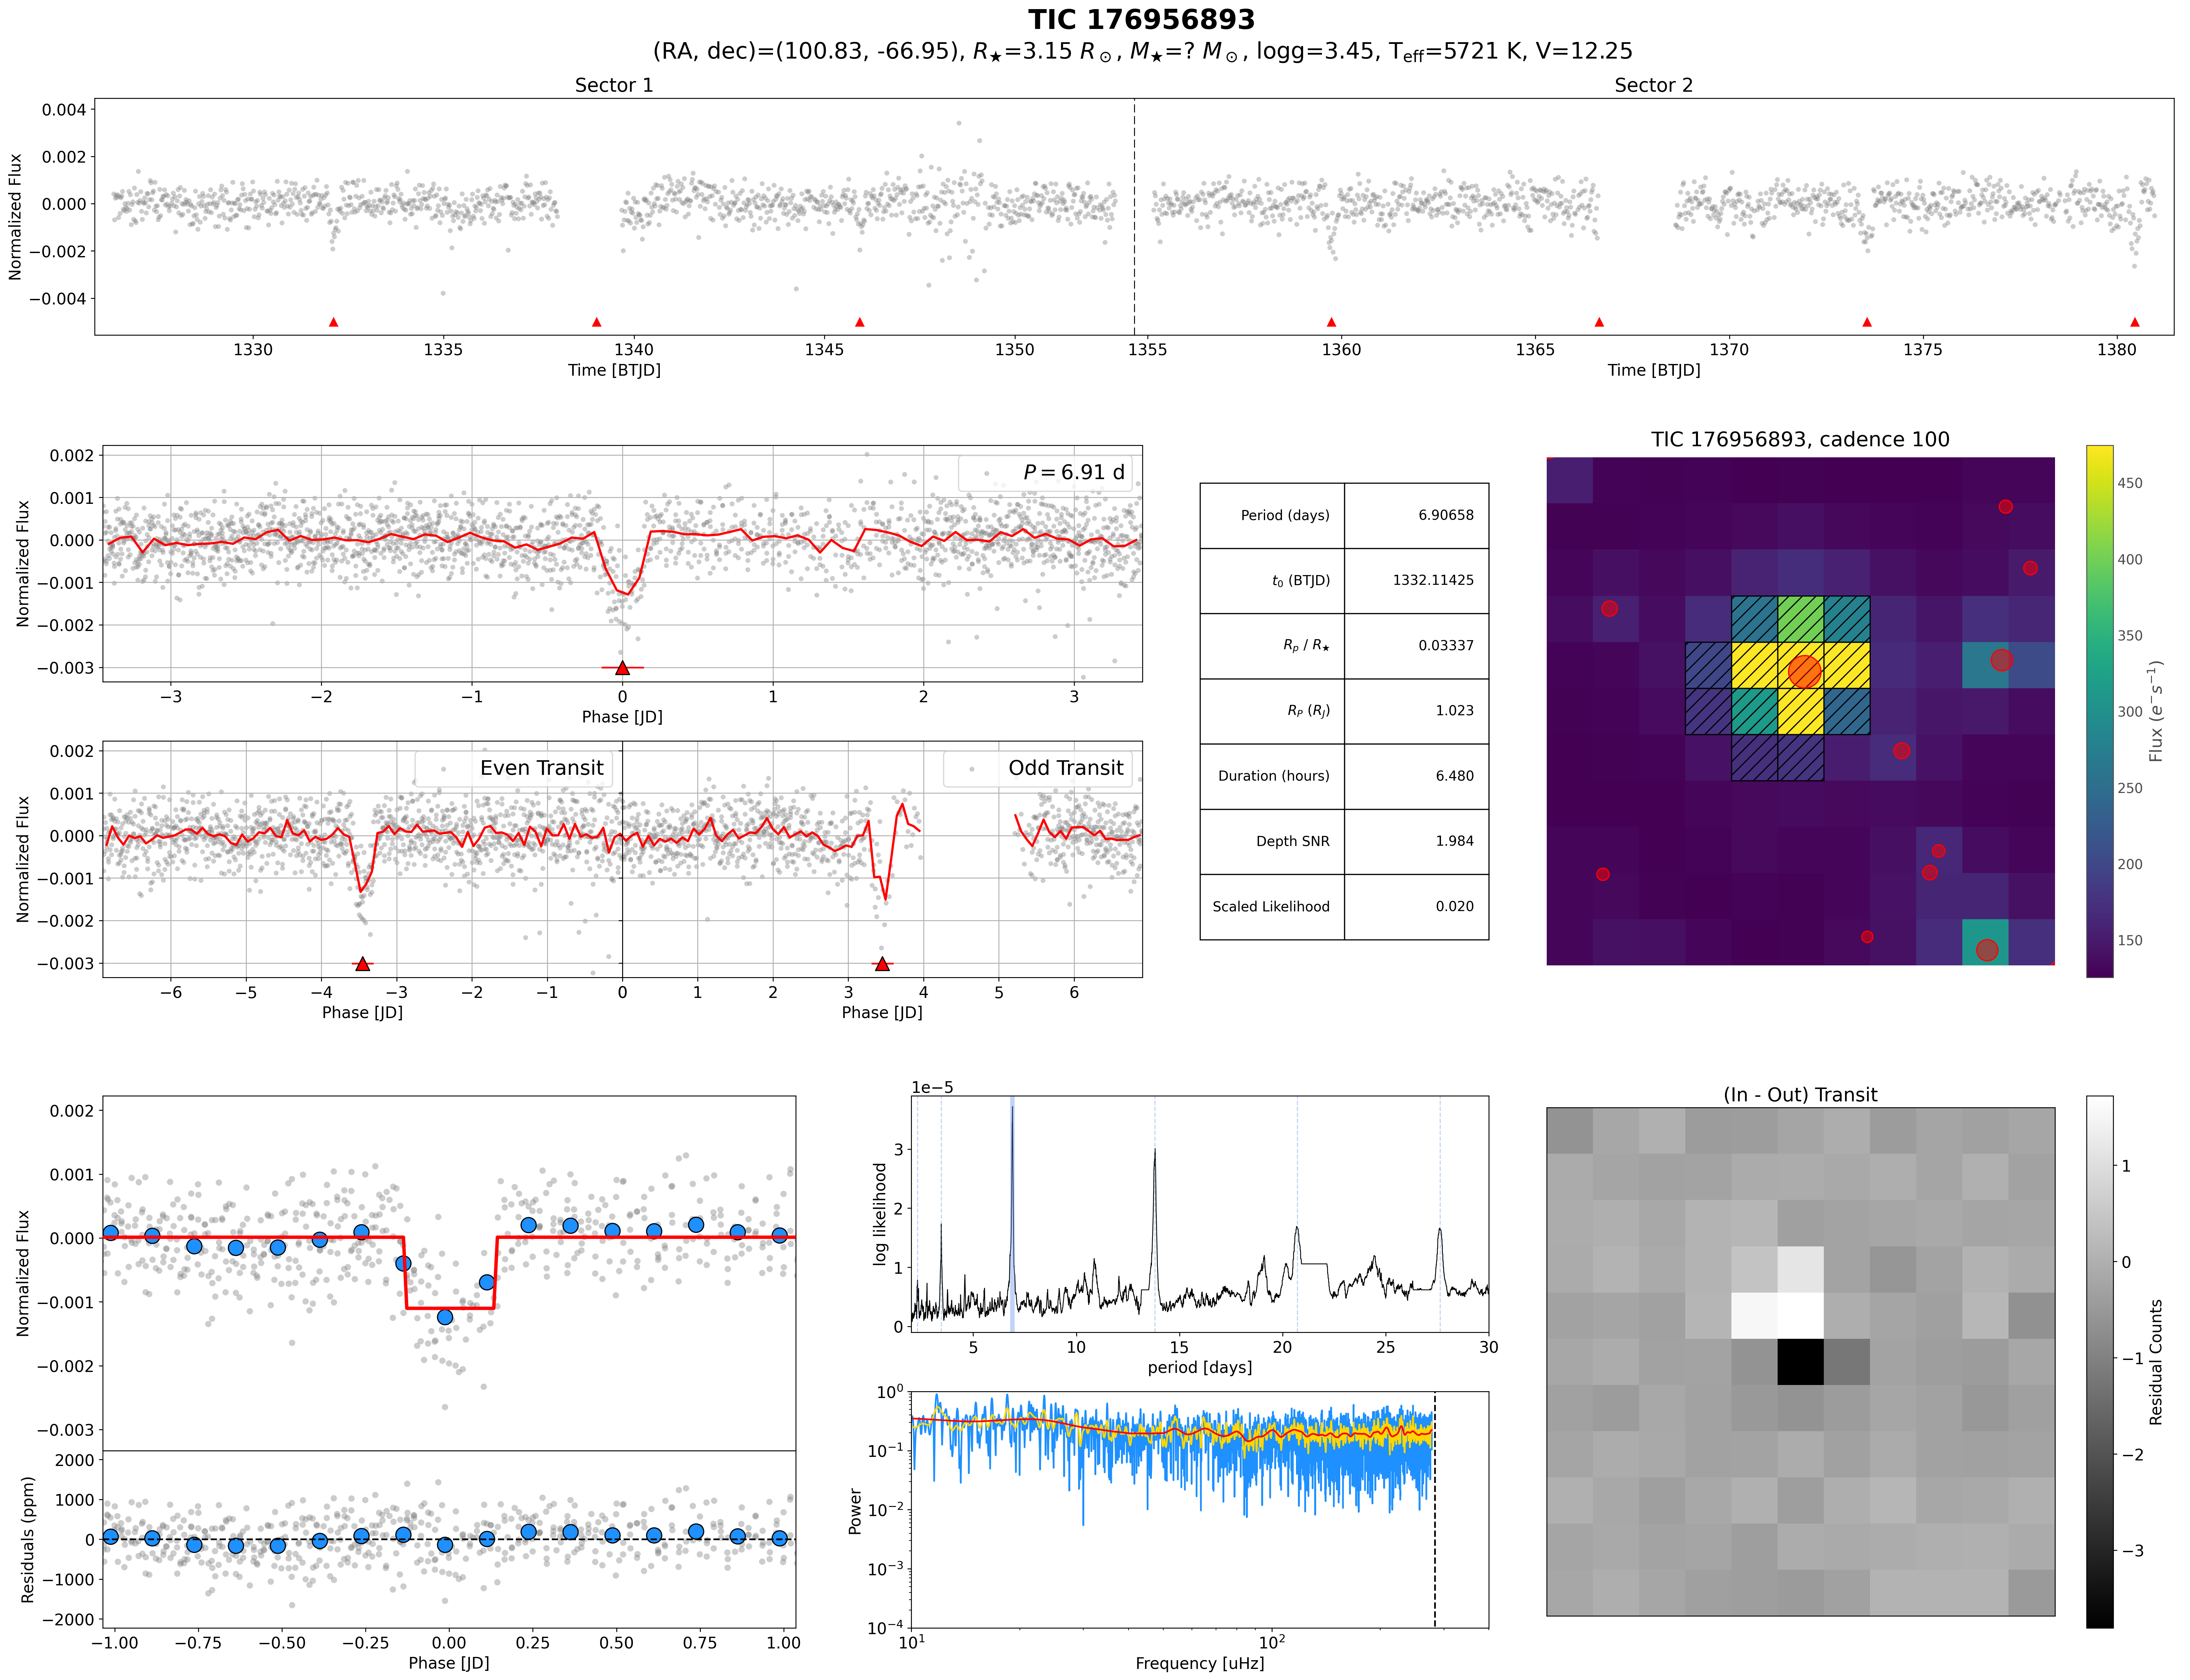

In [11]:
target = giants.Target(ticid=176956893)
target.fetch_and_clean_data(sectors=[1,2])
target.create_summary_plot()